# Imports

In [164]:
import os
os.system("pip install funcy pandas numpy scipy seaborn ipywidgets openpyxl wordcloud")

0

In [165]:
import pandit as pd
import numpy as np
import funcy as fc
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter
import requests
import re
from tqdm import tqdm
tqdm.pandas()
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


In [166]:
tf.config.list_physical_devices('GPU')

[]

# Loading Data

## Dataset

In [167]:
df_reddit= pd.read_json('https://raw.githubusercontent.com/QuentinTilman/PollBERT-paper/master/RedditPoll350k/RedditPoll350K_categorized.json')
del df_reddit['Unnamed: 0']

## Preprocessing Word Libraries

In [168]:
stop_words = ["able","about","above","abroad","according","accordingly","across","actually","adj","after","afterwards","again","against","ago","ahead","ain't","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","a's","aside","ask","asking","associated","at","available","away","awfully","back","backward","backwards","be","became","because","become","becomes","becoming","been","before","beforehand","begin","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","came","can","cannot","cant","can't","caption","cause","causes","certain","certainly","changes","clearly","c'mon","co","co.","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","c's","currently","dare","daren't","definitely","described","despite","did","didn't","different","directly","do","does","doesn't","doing","done","don't","down","downwards","during","each","edu","eg","eight","eighty","either","else","elsewhere","end","ending","enough","entirely","especially","et","etc","even","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","fairly","far","farther","few","fewer","fifth","first","five","followed","following","follows","for","forever","former","formerly","forth","forward","found","four","from","further","furthermore","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","had","hadn't","half","happens","hardly","has","hasn't","have","haven't","having","he","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","here's","hereupon","hers","herself","he's","hi","him","himself","his","hither","hopefully","how","howbeit","however","hundred","i'd","ie","if","ignored","i'll","i'm","immediate","in","inasmuch","inc","inc.","indeed","indicate","indicated","indicates","inner","inside","insofar","instead","into","inward","is","isn't","it","it'd","it'll","its","it's","itself","i've","just","k","keep","keeps","kept","know","known","knows","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","likewise","little","look","looking","looks","low","lower","ltd","made","mainly","make","makes","many","may","maybe","mayn't","me","mean","meantime","meanwhile","merely","might","mightn't","mine","minus","miss","more","moreover","most","mostly","mr","mrs","much","must","mustn't","my","myself","name","namely","nd","near","nearly","necessary","need","needn't","needs","neither","never","neverf","neverless","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","no-one","nor","normally","not","nothing","notwithstanding","novel","now","nowhere","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","one's","only","onto","opposite","or","other","others","otherwise","ought","oughtn't","our","ours","ourselves","out","outside","over","overall","own","particular","particularly","past","per","perhaps","placed","please","plus","possible","presumably","probably","provided","provides","que","quite","qv","rather","rd","re","really","reasonably","recent","recently","regarding","regardless","regards","relatively","respectively","right","round","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","shan't","she","she'd","she'll","she's","should","shouldn't","since","six","so","some","somebody","someday","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","there'd","therefore","therein","there'll","there're","theres","there's","thereupon","there've","these","they","they'd","they'll","they're","they've","thing","things","think","third","thirty","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","till","to","together","too","took","toward","towards","tried","tries","truly","try","trying","t's","twice","two","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","upwards","us","use","used","useful","uses","using","usually","v","value","various","versus","very","via","viz","vs","want","wants","was","wasn't","way","we","we'd","welcome","well","we'll","went","were","we're","weren't","we've","what","whatever","what'll","what's","what've","when","whence","whenever","where","whereafter","whereas","whereby","wherein","where's","whereupon","wherever","whether","which","whichever","while","whilst","whither","who","who'd","whoever","whole","who'll","whom","whomever","who's","whose","why","will","willing","wish","with","within","without","wonder","won't","would","wouldn't","yes","yet","you","you'd","you'll","your","you're","yours","yourself","yourselves","you've","zero","a","how's","i","when's","why's","b","c","d","e","f","g","h","j","l","m","n","o","p","q","r","s","t","u","uucp","w","x","y","z","I","www","amount","bill","bottom","call","computer","con","couldnt","cry","de","describe","detail","due","eleven","empty","fifteen","fifty","fill","find","fire","forty","front","full","give","hasnt","herse","himse","interest","itse”","mill","move","myse”","part","put","show","side","sincere","sixty","system","ten","thick","thin","top","twelve","twenty","abst","accordance","act","added","adopted","affected","affecting","affects","ah","announce","anymore","apparently","approximately","aren","arent","arise","auth","beginning","beginnings","begins","biol","briefly","ca","date","ed","effect","et-al","ff","fix","gave","giving","heres","hes","hid","home","id","im","immediately","importance","important","index","information","invention","itd","keys","kg","km","largely","lets","line","'ll","means","mg","million","ml","mug","na","nay","necessarily","nos","noted","obtain","obtained","omitted","ord","owing","page","pages","poorly","possibly","potentially","pp","predominantly","present","previously","primarily","promptly","proud","quickly","ran","readily","ref","refs","related","research","resulted","resulting","results","run","sec","section","shed","shes","showed","shown","showns","shows","significant","significantly","similar","similarly","slightly","somethan","specifically","state","states","stop","strongly","substantially","successfully","sufficiently","suggest","thered","thereof","therere","thereto","theyd","theyre","thou","thoughh","thousand","throug","til","tip","ts","ups","usefully","usefulness","'ve","vol","vols","wed","whats","wheres","whim","whod","whos","widely","words","world","youd","youre"]

In [169]:
r = requests.get("https://raw.githubusercontent.com/dariusk/corpora/master/data/religion/religions.json")
religions = r.json()
beliefs = []
for major in [item for item in religions.values()]:
    majors = [m for m in major]
    beliefs.extend(majors)
    try:
        for minor in major.values():
            for religion in minor:
                beliefs.append(religion)
    except:
        next
beliefs.extend(["atheist","christian","religious","non-religious","not religious"])

In [170]:
r = requests.get("https://raw.githubusercontent.com/Imagin-io/country-nationality-list/master/countries.json")
dictionary = r.json()
df_dictionary = pd.DataFrame(dictionary)
def nation(item):
    item["en_short_name"] = " "+item["en_short_name"].lower()+" "
    item["alpha_2_code"] = " "+item["alpha_2_code"].lower()+" "
    item["alpha_3_code"] = " "+item["alpha_3_code"].lower()+" "
    nationality = re.split(', | or',item["nationality"].lower())
    item["nationality"] = nationality
    return item
df_dictionary=df_dictionary.progress_apply(nation,axis=1)

countries = []
countries.extend(df_dictionary["en_short_name"].values)
countries.extend(df_dictionary["alpha_2_code"].values)
countries.extend(df_dictionary["alpha_3_code"].values)

100%|██████████| 249/249 [00:00<00:00, 6397.79it/s]


In [171]:
nationalities = []
for item in df_dictionary["nationality"].values:
    for label in item:
        nationalities.append(label)

locations = []
locations.extend(df_dictionary["en_short_name"].values)
locations.extend(df_dictionary["alpha_2_code"].values)
locations.extend(df_dictionary["alpha_3_code"].values)
locations.extend([item.lower() for item in ["Asia", "Africa", "North America", "South America", "Antarctica", "Europe", "Australia","rest of the world","usa","us","eu","america",'other country']])

# Preprocessing

## Preprocessing methods

In [172]:
num_choices = 6
choices_names=[f'choice_{i}' for i in range(num_choices)]
mode='proba'

In [173]:
def get_demographics(x):
    parenthesized=[s[s.find("(")+1:s.rfind(")")]  for s in x.options.keys()]
    parenthesized=[s for s in parenthesized if s]
    parenthesized_count=pd.Series.value_counts(parenthesized)
    return list(parenthesized_count[parenthesized_count>1].index)

In [174]:
def split_questions(x):
    demographics=get_demographics(x)

    l=[]
    for d in demographics:
        l+=[fc.project(x.options, [x for x in x.options if f'({d})' in x])] #if row has multiple demographics its repeated in dataset?
    if l:
        x.options=l
        x['split']=True
    else:
        x.options=[x.options]
        x['split']=False
    return x

In [175]:
def extract_demographic(x):
    demographics = get_demographics(x)
    x['demographic']=''
    if not demographics:
        return x
    if len(demographics)>1:
        print('failure:',demographics, x.options)
        return x
    demographic=demographics[0]
    x['options'] = {k.replace(f'({demographic})',''):v for (k,v) in x.options.items()}
    x['demographic']=demographic.lower()
    return x

In [176]:
def preprocess(x):
    choices = (list(x.options.keys())+['']*num_choices)[:num_choices]
    for i,n in enumerate(choices_names):
        x[n]=choices[i]
    scores = np.array(list(x.options.values())+[-1]*num_choices)[:num_choices]*1.0
    if mode=='binary':
        x['label'] = np.random.choice(np.flatnonzero(scores == scores.max()))
    else:
        x['nb_votes'] = scores[scores!=-1].sum()
        scores[scores!=-1]= scores[scores!=-1]/scores[scores!=-1].sum()
        x['label'] = scores
    del x['options']
    x['task']=0
    return x

In [177]:
def normalize_nationality(x):
    terms = ["man","guy","and"] + stop_words
    label = x["demographic"].lower()
    if (2 <= len(label) <= 3) and label not in terms:
      if any(token.replace(" ","").lower() in label.split(" ") for token in nationalities):
        token = [token for token  in nationalities if token.replace(" ","").lower() in label.split(" ")]
        if("not" in label) | ("non" in label):
              label = "not "+token[0]
        else:
              label = token[0]
    elif any(token.lower() in label.split(" ") for token in nationalities):
        token = [token for token  in nationalities if token.lower() in label.split(" ")]
        if("not" in label) | ("non" in label):
            label = "not "+token[0]
        else:
            label = token[0]
    elif any(token.lower() in label.split("-") for token in nationalities):
        token = [token for token  in nationalities if token.lower() in label.split("-")]
        if("not" in label) | ("non" in label):
            label = "not "+token[0]
        else:
            label = token[0]
            
    x["demographic"] = label
    return x

In [178]:
def normalize_countries(x):
    terms = ["man","guy","and"] + stop_words
    label = x["demographic"].lower()
    if (2 <= len(label) <= 3) and label not in terms:
      if any(token.replace(" ","").lower() in label.split(" ") for token in countries):
        token = [token for token  in countries if token.replace(" ","").lower() in label.split(" ")]
        if("not" in label) | ("non" in label):
              label = "not "+token[0]
        else:
              label = token[0]
    elif any(token.lower() in label.split(" ") for token in countries):
        token = [token for token  in countries if token.lower() in label.split(" ")]
        if("not" in label) | ("non" in label):
            label = "not "+token[0]
        else:
            label = token[0]
    elif any(token.lower() in label.split("-") for token in countries):
        token = [token for token  in countries if token.lower() in label.split("-")]
        if("not" in label) | ("non" in label):
            label = "not "+token[0]
        else:
            label = token[0]
    x["demographic"] = label
    return x

In [179]:
def normalize_genders(x):
    label = x["demographic"].lower()
    female= ["f","female","woman","chick","girl"]
    male = ["m","male","man","guy","men"]
    if any(token.lower() in female for token in label.split(" ")) | any(token.lower() in female for token in label.split("-")):
        if ("not" in label) | ("non" in label):
            label = "not female"
        else:
            label = "female"
    if any(token in male for token in label.split(" ")) | any(token in male for token in label.split("-")):
        if("not" in label) | ("non" in label):
            label = "not male"
        else:
            label = "male"
    x["demographic"] = label
    return x

In [180]:
def normalize_politics(x):
    label = x["demographic"].lower()
    right = ["d","democratic","right",'right-leaning']
    left = ["republican","republicans","left","left-leaning","r"]
    if any(token.lower() in label.split(" ") for token in right) | any(token.lower() in label.split("-") for token in right):
        if("not" in label) | ("non" in label):
            label = "not democratic"
        else: 
            label = "democratic"
    elif any(token.lower() in label.split(" ") for token in left) | any(token.lower() in label.split("-") for token in left):
        if("not" in label) | ("non" in label):
            label = "not republican"
        else: 
            label = "republican"
    
    x["demographic"] = label
    return x

In [181]:
def to_percentage(x):
    options = x["options"]
    try:
        x["nb_votes"] = sum(options.values())
        x["options"] = {key:(value/sum(options.values())) for key,value in options.items()}
        return x
    except:
        pass

In [182]:
def get_nationality(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if any(token in demo for token in nationalities):
        category = "nationality"
    x["demographic_category"] = category
    return x

In [183]:
def get_countries(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if any(token in demo for token in locations):
        category = "location"
    x["demographic_category"] = category
    return x

In [184]:
def get_genders(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    female= ["f","female","woman","chick","girl","women"]
    male = ["m","male","man","guy","boy","men"]
    alphabetplus = [item.lower() for item in ["straight","non-binary","nonbinary","non binary","queer","trans","transgender","Pansexual","asexual","skoliosexual","cisgender","genderqueer","intersex","gay","homosexual","lesbian"]]
    if any(token in female for token in demo.split()):
        category = "gender"
    if any(token in male for token in demo.split()):
        category = "gender"
    if any(token in alphabetplus for token in demo.split()):
        category = "gender"
    x["demographic_category"] = category
    return x

In [185]:
def get_politics(x):
    demo = x["demographic"]
    category = x["demographic_category"]

    right = ["d","democratic","right","r",'right-leaning',"liberal","democrat","right-wing"]
    left = ["republican","republicans","left","left-leaning","conservative","left-wing"]
    if any(token in demo.split(" ") for token in right):
        category = "politics"
    if any(token in demo.split(" ") for token in left):
        category = "politics"
    x["demographic_category"] = category
    return x

In [186]:
def get_diet(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    diets = ["vegan","vegetarian","meat-eater"]
    if any(token in demo.split(" ") for token in diets):
        category = "diet"
    x["demographic_category"] = category
    return x

In [187]:
def has_digit(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if re.search(r'\d+', demo):
            category = "digit "+demo
    x["demographic_category"] = category
    return x

In [188]:
def get_years(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if re.search(r'\d+', demo):
            if 2023 > int(re.search(r'\d+', demo).group()) > 1000:
                category = "years"
    x["demographic_category"] = category
    return x

In [189]:
def get_age(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if (str(category) != "nan"):
        if("digit" in category):
            if any(item in demo for item in ["y/o",">","<","+","below","under","over","years","yo","y.o","younger","older","born",'student','teenager',"adult",'gen z','gen y','gen x']):
                category = "age"
    x["demographic_category"] = category
    return x

In [190]:
def get_ethnicity(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    colours = ["white","black","caucasian","dusky","orange-colored","yellow","red","indian","malay","mongoloid","carib","nergoid"]
    if any(colour in demo for colour in colours):
        category = "ethnicity"
    x['demographic_category'] = category
    return x

In [191]:
def get_belief(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if any(b in demo for b in beliefs):
        category = "belief"
    x["demographic_category"] = category
    return x

In [192]:
def get_other(x):
    category = x["demographic_category"]
    if str(category) == "nan" or "digit" in category:
        category = "other"
    x["demographic_category"] = category
    return x

## Applying Preprocessing

In [193]:
df_reddit_split=df_reddit.progress_apply(split_questions,axis=1).explode('options')

100%|██████████| 312306/312306 [08:36<00:00, 605.08it/s]


In [194]:
df_reddit_split=df_reddit_split.progress_apply(extract_demographic,axis=1)

  6%|▌         | 19654/322543 [00:36<07:37, 662.34it/s]

In [ ]:
df_reddit_demo = df_reddit_split[df_reddit_split.demographic.map(len).map(bool)]

In [ ]:
df_reddit_demographics_normalized_labels=df_reddit_demo.progress_apply(normalize_nationality,axis=1)
df_reddit_demographics_normalized_labels=df_reddit_demographics_normalized_labels.progress_apply(normalize_genders,axis=1)
df_reddit_demographics_normalized_labels=df_reddit_demographics_normalized_labels.progress_apply(normalize_countries,axis=1)
df_reddit_demographics_normalized_labels=df_reddit_demographics_normalized_labels.progress_apply(normalize_politics,axis=1)

100%|██████████| 20214/20214 [00:02<00:00, 8728.58it/s] 


In [ ]:
df_reddit_percentage = df_reddit_demographics_normalized_labels.progress_apply(preprocess,axis=1)
df_reddit_percentage = df_reddit_percentage.dropna()

100%|██████████| 20214/20214 [00:16<00:00, 1192.68it/s]


In [ ]:
df_reddit_percentage["demographic_category"] = np.NaN
df_reddit_category = df_reddit_percentage.progress_apply(has_digit,axis=1)
df_reddit_category = df_reddit_category.progress_apply(get_age,axis=1)
df_reddit_category = df_reddit_category.progress_apply(get_years,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_nationality,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_genders,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_countries,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_politics,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_diet,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_ethnicity,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_belief,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_other,axis=1)

100%|██████████| 20159/20159 [00:02<00:00, 9384.34it/s] 


In [ ]:
df_reddit_category

,id,title,options,created,category,split,demographic,nb_votes,demographic_category
1,yvae7l,Do You Believe Your Congressional District is ...,"{'Yes ': 0.6730769230769231, 'No ': 0.32692307...",1.668455e+09,news_&_social_concern,True,democratic,52.0,politics
1,yvae7l,Do You Believe Your Congressional District is ...,"{'Yes ': 0.4666666666666667, 'No ': 0.53333333...",1.668455e+09,news_&_social_concern,True,republican,15.0,politics
65,yuipdn,Does body count matter?,"{'Yes ': 0.5737704918032787, 'No ': 0.42622950...",1.668383e+09,diaries_&_daily_life,True,male,122.0,gender
65,yuipdn,Does body count matter?,"{'Yes ': 0.2826086956521739, 'No ': 0.71739130...",1.668383e+09,diaries_&_daily_life,True,female,46.0,gender
66,yui5re,are your nails long or short?,"{'Long ': 0.06680584551148225, 'Short ': 0.933...",1.668382e+09,fashion_&_style,True,male,479.0,gender
...,...,...,...,...,...,...,...,...,...
311046,g3cqyd,Would you rather have Fascism or Communism,"{'Fascism ': 0.631578947368421, 'Communism ': ...",1.587165e+09,news_&_social_concern,True,democratic,38.0,politics
311077,g2y3ao,Can you go to the McDrive using a bicycle?,"{'Yes ': 0.6864864864864865, 'No ': 0.31351351...",1.587113e+09,diaries_&_daily_life,True,estimated,185.0,other
311525,fwnyza,Chicken balls or pork balls?,"{' chicken balls.': 0.5625, ' Pork balls': 0.4...",1.586278e+09,food_&_dining,True,chinese,64.0,nationality
311887,fsruvs,political ideology,"{'centrist/moderate ': 0.38095238095238093, 'o...",1.585712e+09,news_&_social_concern,True,comment,21.0,other


#### Model

@inproceedings{antypas-etal-2022-twitter,
    title = "{T}witter Topic Classification",
    author = "Antypas, Dimosthenis  and
      Ushio, Asahi  and
      Camacho-Collados, Jose  and
      Silva, Vitor  and
      Neves, Leonardo  and
      Barbieri, Francesco",
    booktitle = "Proceedings of the 29th International Conference on Computational Linguistics",
    month = oct,
    year = "2022",
    address = "Gyeongju, Republic of Korea",
    publisher = "International Committee on Computational Linguistics",
    url = "https://aclanthology.org/2022.coling-1.299",
    pages = "3386--3400"
}

In [ ]:
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import expit
MODEL = f"cardiffnlp/tweet-topic-21-multi"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
class_mapping = model.config.id2label

In [ ]:
def get_topic_label(x):
    try:
        text = x["title"]
        tokens = tokenizer(text, return_tensors='pt')
        output = model(**tokens)

        scores = output[0][0].detach().numpy()
        scores = expit(scores)
        x["question_topic"] = class_mapping[scores.argmax()]
    except:
        x["question_topic"] = "other"
    return x

# Data Visualisation

## Examples per demographic category

In [ ]:
ratio_demographic = len(df_reddit_category)/len(df_reddit)
ratio_demographic

0.06454887193970017

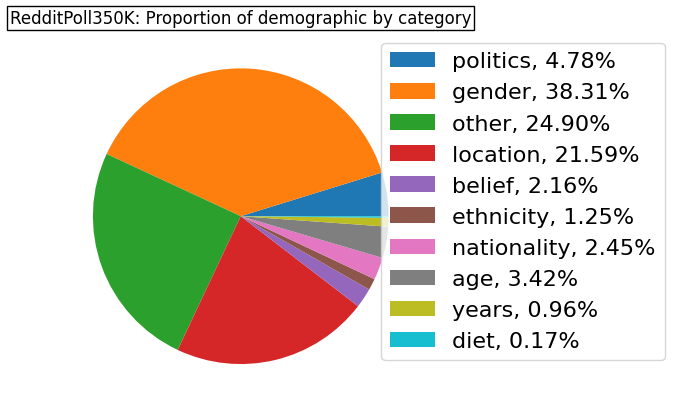

In [ ]:
size = len(df_reddit_category)
counter = Counter(df_reddit_category["demographic_category"])
percentages =  {key : (counter[key]/size) for key in counter.keys()} 
# print(percentages)
# percentages = sorted(percentages.items(),key=lambda item:item[1],reverse=True)
demo_categories_reddit = {}
for item in percentages:
        demo_categories_reddit[item] = percentages[item]
labels_demo = ["nationality","location","gender","politics","diet","years","age","ethnicity","belief"]
demo_categories_reddit["other"] = 1-sum([percentages[key] for key in labels_demo])

labels_demo = [f'{l}, {s*100:0.2f}%' for l, s in zip(list(demo_categories_reddit.keys()), list(demo_categories_reddit.values()))]
#plt.barh(list(categories_reddit.keys()),categories_reddit.values())
plt.pie(list(demo_categories_reddit.values()),radius=1)
plt.title("RedditPoll350K: Proportion of demographic by category", bbox={'facecolor':'1', 'pad':2})
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels_demo,prop={'size': 16})
plt.show()

In [ ]:
df_reddit_category.drop(df_reddit_category[df_reddit_category["demographic_category"] == "other"].index,inplace=True)

In [ ]:
counts = df_reddit_category["demographic"].value_counts()
keys = [k for k in df_reddit_category["demographic"].value_counts().keys() if counts[k] > 50]
df_reddit_category_reduced = pd.DataFrame([item for item in df_reddit_category.values if item[6] in keys],columns = df_reddit_category.columns)

In [ ]:
df_reddit_category_reduced

,id,title,options,created,category,split,demographic,nb_votes,demographic_category
0,yvae7l,Do You Believe Your Congressional District is ...,"{'Yes ': 0.6730769230769231, 'No ': 0.32692307...",1.668455e+09,news_&_social_concern,True,democratic,52.0,politics
1,yvae7l,Do You Believe Your Congressional District is ...,"{'Yes ': 0.4666666666666667, 'No ': 0.53333333...",1.668455e+09,news_&_social_concern,True,republican,15.0,politics
2,yuipdn,Does body count matter?,"{'Yes ': 0.5737704918032787, 'No ': 0.42622950...",1.668383e+09,diaries_&_daily_life,True,male,122.0,gender
3,yuipdn,Does body count matter?,"{'Yes ': 0.2826086956521739, 'No ': 0.71739130...",1.668383e+09,diaries_&_daily_life,True,female,46.0,gender
4,yui5re,are your nails long or short?,"{'Long ': 0.06680584551148225, 'Short ': 0.933...",1.668382e+09,fashion_&_style,True,male,479.0,gender
...,...,...,...,...,...,...,...,...,...
9323,gtyqij,Are Americans too loving of their flag?,"{'Yes ': 0.8130841121495327, 'No ': 0.18691588...",1.590930e+09,news_&_social_concern,True,not american,642.0,location
9324,gtyqij,Are Americans too loving of their flag?,"{'Yes ': 0.5598958333333334, 'No ': 0.44010416...",1.590930e+09,news_&_social_concern,True,american,768.0,location
9325,gkzer2,Lying about your age,"{'Yes ': 0.42276422764227645, 'No ': 0.5772357...",1.589653e+09,diaries_&_daily_life,True,male,123.0,gender
9326,g3cqyd,Would you rather have Fascism or Communism,"{'Fascism ': 0.15714285714285714, 'Communism '...",1.587165e+09,news_&_social_concern,True,republican,70.0,politics


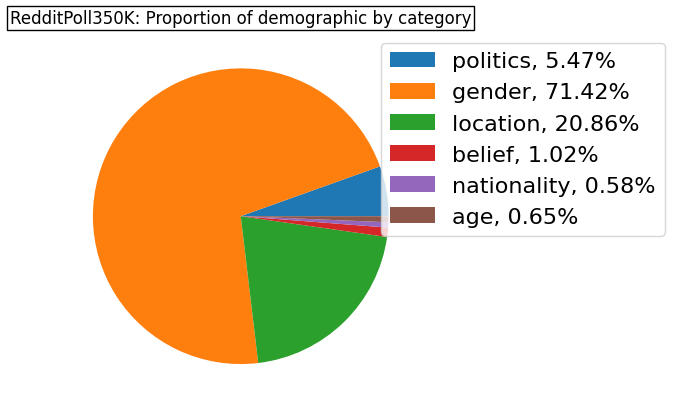

In [ ]:
size = len(df_reddit_category_reduced)
counter = Counter(df_reddit_category_reduced["demographic_category"])
percentages =  {key : (counter[key]/size) for key in counter.keys()} 
# print(percentages)
# percentages = sorted(percentages.items(),key=lambda item:item[1],reverse=True)
demo_categories_reddit = {}
for item in percentages:
        demo_categories_reddit[item] = percentages[item]
labels_demo = ["nationality","location","gender","politics","diet","years","age","ethnicity","belief"]

labels_demo = [f'{l}, {s*100:0.2f}%' for l, s in zip(list(demo_categories_reddit.keys()), list(demo_categories_reddit.values()))]
#plt.barh(list(categories_reddit.keys()),categories_reddit.values())
plt.pie(list(demo_categories_reddit.values()),radius=1)
plt.title("RedditPoll350K: Proportion of demographic by category", bbox={'facecolor':'1', 'pad':2})
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels_demo,prop={'size': 16})
plt.show()

## Examples per Question Topics

In [ ]:
df_reddit_category

,id,title,options,created,category,split,demographic,nb_votes,demographic_category
1,yvae7l,Do You Believe Your Congressional District is ...,"{'Yes ': 0.6730769230769231, 'No ': 0.32692307...",1.668455e+09,news_&_social_concern,True,democratic,52.0,politics
1,yvae7l,Do You Believe Your Congressional District is ...,"{'Yes ': 0.4666666666666667, 'No ': 0.53333333...",1.668455e+09,news_&_social_concern,True,republican,15.0,politics
65,yuipdn,Does body count matter?,"{'Yes ': 0.5737704918032787, 'No ': 0.42622950...",1.668383e+09,diaries_&_daily_life,True,male,122.0,gender
65,yuipdn,Does body count matter?,"{'Yes ': 0.2826086956521739, 'No ': 0.71739130...",1.668383e+09,diaries_&_daily_life,True,female,46.0,gender
66,yui5re,are your nails long or short?,"{'Long ': 0.06680584551148225, 'Short ': 0.933...",1.668382e+09,fashion_&_style,True,male,479.0,gender
...,...,...,...,...,...,...,...,...,...
310164,gc0u32,Have you ever had a dream of needing to pee/fi...,"{'Male- Yes, I had this dream. ': 0.671875, 'F...",1.588396e+09,film_tv_&_video,True,nothing more to add,64.0,location
310287,gaq3wm,Phone Cases and Dropping your Phone,{'I have a case and I drop my phone sometimes ...,1.588226e+09,science_&_technology,True,3 or more drops per week,33.0,location
311046,g3cqyd,Would you rather have Fascism or Communism,"{'Fascism ': 0.15714285714285714, 'Communism '...",1.587165e+09,news_&_social_concern,True,republican,70.0,politics
311046,g3cqyd,Would you rather have Fascism or Communism,"{'Fascism ': 0.631578947368421, 'Communism ': ...",1.587165e+09,news_&_social_concern,True,democratic,38.0,politics


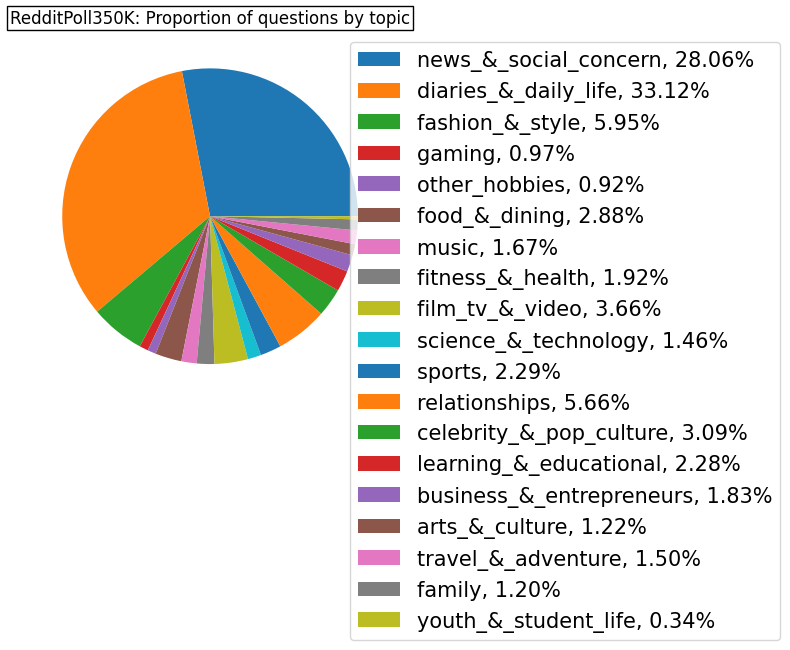

In [ ]:
df_reddit_question_categories =df_reddit_category
question_categories_reddit = { key: round(Counter(df_reddit_question_categories["category"])[key]/len(df_reddit_question_categories),4) for key in Counter(df_reddit_question_categories["category"])}

labels = [f'{l}, {s*100:0.2f}%' for l, s in zip(list(question_categories_reddit.keys()), list(question_categories_reddit.values()))]
#plt.barh(list(categories_reddit.keys()),categories_reddit.values())
plt.pie(list(question_categories_reddit.values()),radius=1)
plt.title("RedditPoll350K: Proportion of questions by topic", bbox={'facecolor':'1', 'pad':2})
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels,prop={'size': 15})
plt.show()

## WordCloud

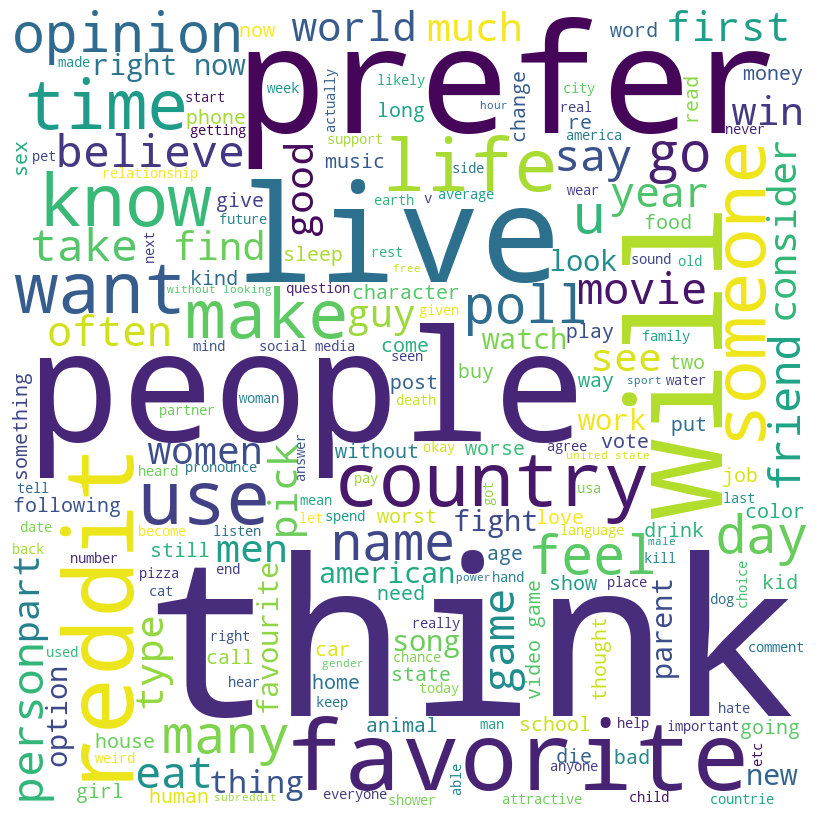

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
comment_words = ''
stopwords = set(STOPWORDS)
stopwords = stopwords.union({"choose","rather","better","best","one","S"})
# iterate through the csv file
for val in df_reddit["title"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

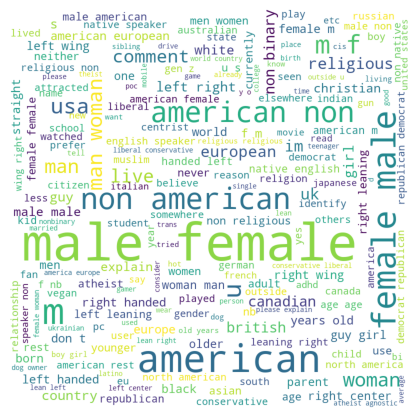

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_reddit_demo["demographic"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Demographic divisiveness Test

In [ ]:
def test(x,dictionary_demo_question):
    demographics = list(x["demographic"])
    for i in range(len(demographics)):
        dictionary_demo_question[demographics[i]].append(list(x["title"])[i])
    return x

def z_test(n1,prop1,s1,n2,prop2,s2):
    SE = np.sqrt(s1**2/n1 + s2**2/n2)
    return (prop1-prop2)/SE

def z_score(n1,prop1,n2,prop2):
    p_hat = (prop1*n1+prop2*n2)/(n1+n2)
    SE = np.sqrt( (p_hat*(1-p_hat))*(1/n1+1/n2))
    return (prop1-prop2)/SE

In [ ]:
df_reddit_category.drop(df_reddit_category[df_reddit_category["demographic_category"] == "other"].index,inplace=True)

In [ ]:
counts = df_reddit_category["demographic"].value_counts()
keys = [k for k in df_reddit_category["demographic"].value_counts().keys() if counts[k] > 50]
df_reddit_category_reduced = pd.DataFrame([item for item in df_reddit_category.values if item[6] in keys],columns = df_reddit_category.columns)

In [ ]:
# def to_choices(x):
#     choices = (list(x.options.keys())+['']*num_choices)[:num_choices]
#     for i,n in enumerate(choices_names):
#         x[n]=choices[i]
#     scores = np.array(list(x.options.values())+[-1]*num_choices)[:num_choices]*1.0
#     del x['options']
#     x['label'] = scores
#     x['task']=0
#     return x

In [ ]:
# df_reddit_category_reduced_choices = df_reddit_category_reduced.progress_apply(to_choices,axis=1)

100%|██████████| 9328/9328 [01:04<00:00, 144.06it/s]


In [ ]:
dictionary_demo_question = {}
for key in df_reddit_category_reduced["demographic"].value_counts().keys():
    dictionary_demo_question[key] = []

In [ ]:
df_reddit_category_reduced_choices = df_reddit_category_reduced.groupby(["title"]).apply(test,dictionary_demo_question)

C:\Users\Quent\AppData\Local\Temp\ipykernel_1292\1784354361.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_reddit_category_reduced_choices = df_reddit_category_reduced_choices.groupby(["title"]).apply(test,dictionary_demo_question)


In [ ]:
demo_pair_questions = {}
for k in dictionary_demo_question.keys():
    for l in dictionary_demo_question.keys():
        if(k != l):
            s = set(dictionary_demo_question[k]).intersection(set(dictionary_demo_question[l]))
            if(len(s) != 0):
                    if((l,k) not in demo_pair_questions.keys()):
                        demo_pair_questions[(k,l)] = set(dictionary_demo_question[k]).intersection(set(dictionary_demo_question[l]))

In [ ]:
keys_question = df_reddit_category_reduced_choices[["title"]].value_counts().keys()

In [ ]:
df_reddit_category_reduced_choices[df_reddit_category_reduced_choices["title"]=='Should there be a seperate men and women gym?' ]

,id,title,created,category,split,demographic,nb_votes,demographic_category,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,label,task
4267,tv1kd3,Should there be a seperate men and women gym?,1.648962e+09,fitness_&_health,True,male,4895.0,gender,Yes,No,,,,,"[0.2226762002042901, 0.7773237997957099, -1.0,...",0
4268,tv1kd3,Should there be a seperate men and women gym?,1.648962e+09,fitness_&_health,True,female,1305.0,gender,Yes,No,,,,,"[0.5670498084291188, 0.4329501915708812, -1.0,...",0


In [ ]:
items = df_reddit_category_reduced_choices[df_reddit_category_reduced_choices["title"] == 'Should there be a seperate men and women gym?']
labels_A = np.array(list(items[items["demographic"] == 'male']["label"])[0])
nA = items[items["demographic"] == 'male']["nb_votes"].values[0]
nA

4895.0

In [ ]:
p_values_dict = {}
for key in demo_pair_questions:
    p_values_dict[key] = []
    
for (a,b) in demo_pair_questions:
    questions = demo_pair_questions[(a,b)]
    i = 0
    for q in questions:
        items = df_reddit_category_reduced_choices[df_reddit_category_reduced_choices["title"] == q]

        labels_A = np.array(list(items[items["demographic"] == a]["label"])[0])
        nA = items[items["demographic"] == a]["nb_votes"].values[0]
        v_choice0_a = labels_A[labels_A != -1][0]
        stdA = np.std(labels_A[labels_A != -1])
        meanA = np.mean(labels_A[labels_A != -1])
        propA = v_choice0_a
        
        labels_B = np.array(list(items[items["demographic"] == b]["label"])[0])
        nB = items[items["demographic"] == b]["nb_votes"].values[0]
        v_choice0_b = labels_B[labels_B != -1][0]
        stdB = np.std(labels_B[labels_B != -1])
        meanB = np.mean(labels_B[labels_B != -1])
        propB = v_choice0_b
        p_values_dict[(a,b)].append(sc.stats.norm.sf(abs(z_score(nA,propA,nB,propB))))

C:\Users\Quent\AppData\Local\Temp\ipykernel_1292\2405858529.py:14: RuntimeWarning: invalid value encountered in double_scalars
  return (prop1-prop2)/SE


In [ ]:
z_score(1,1090/4895,1,740/1305),sc.stats.norm.sf(abs(z_score(1,1090/4895,1,740/1305)))

(-0.4981553375921647, 0.3091872796230597)

In [ ]:
mean_p_values = {}
for key in p_values_dict.keys():
    values = np.array(p_values_dict[key])
    values = [v for v in values if not np.isnan(v)]
    mean_p_values[key] = np.median([v for v in values if v != 0.0])
mean_p_values

{('male', 'female'): 0.05183714369622737,
 ('male', 'american'): 0.1400775601353964,
 ('male', 'republican'): 0.05299906572439303,
 ('male', 'democratic'): 5.6048764776131817e-05,
 ('male', 'religious'): 0.23087690671214647,
 ('male', 'women'): 0.09342875133152029,
 ('male', 'under 18'): 0.0002940015012633485,
 ('male', 'non-binary'): 0.14663584848531552,
 ('female', 'american'): 0.08375747391119714,
 ('female', 'republican'): 0.017657347313266524,
 ('female', 'democratic'): 3.395622450190613e-08,
 ('female', 'religious'): 0.24598160510336733,
 ('female', 'women'): 0.20858537905496238,
 ('female', 'under 18'): 0.0006467334600136651,
 ('female', 'non-binary'): 0.14316018469614158,
 ('american', 'not american'): 0.017162107058054835,
 ('american', 'european'): 0.025159839611782905,
 ('not american', 'republican'): 0.01639938592599663,
 ('not american', 'democratic'): 0.002671901977631062,
 ('not american', 'european'): 0.1937460109305156,
 ('not american', ' usa '): 0.07569843377948521,
